### 3.2 Classification and regression with a two-layer perceptron

#### 3.2.3 Function approximation

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm

In [101]:
def error_mse(T, Y):
    #return np.sum((T - Y) ** 2) / 2
    return np.mean(((Y-T)**2))

def accuracy(T, Y):
    #return np.sum((T - Y) ** 2) / 2
    return np.sum(abs(T-Y)/2)/len(T)

def phi(x):
    return 2/(1+np.exp(-x))-1


def phi_prime(x):
    return 0.5*((1+phi(x))*(1-phi(x)))

def forward_pass(X,W,V):
    #print(W.shape)
    #print(X.shape)
    H = phi(np.matmul(W,X))
    #print(H.shape)
    H=np.vstack([H,np.ones(np.shape(H)[1])])
    #print(H.shape)
    #print(V.shape)
    O = phi(np.matmul(V,H))
    #print(O.shape)
    return H,O

def backward_pass(O,T,H,V,hidden):
    delta_o = np.multiply((O-T),phi_prime(O))
    #print("hej hopp")
    #print(V.shape)
    #print(delta_y.shape)
    #print(phi_prime(H).shape)
    delta_h = np.multiply(np.matmul(np.transpose(V),delta_o),phi_prime(H))
    delta_h = delta_h[0:hidden]
    return delta_o, delta_h

def update_weights(X,H,W,V,eta,delta_o, delta_h,dw,dv,alpha):
    dw = alpha*dw-(1-alpha)*np.matmul(delta_h,np.transpose(X))
    dv = alpha*dv - (1-alpha)*np.matmul(delta_o,np.transpose(H))
    W = W + dw*eta
    V = V + dv*eta
    return W,V,dw,dv

def backprop(eta,X,T,W,V,hidden,epochs,alpha=0.9):
    weights1 = []
    weights2 = []
    mse_errors = []
    accuracys = []
    #acc = 0
    dw = np.ones(W.shape)
    dv = np.ones(V.shape)
    #print(eta,X,T,W,V,hidden,epochs)
    for i in range(epochs):
        weights1.append(W)
        weights2.append(V)
        H,O = forward_pass(X,W,V)
        mse = error_mse(T,O)
        mse_errors.append(mse)
        acc = accuracy(T,O)
        accuracys.append(acc)
        delta_o,delta_h = backward_pass(O,T,H,V,hidden)
        W,V,dw,dv = update_weights(X,H,W,V,eta,delta_o,delta_h,dw,dv,alpha)
        #print(H)
        #print("print")
        #print(Y)
        
    weights1.append(W)
    weights2.append(V)
    
    return weights1, weights2,mse_errors,accuracys


In [102]:
def predict(validation,W,V, classification = True):
        #print(validation)
        _, prediction = forward_pass(validation,W,V)
        
        return prediction

(21, 21)


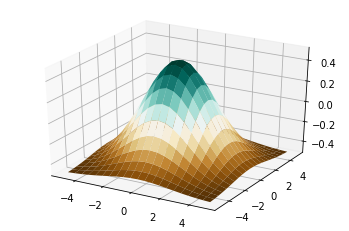

(3, 441)
(10001, 25, 3)
(10001, 1, 26)
0.3958467718839389
(1, 441)


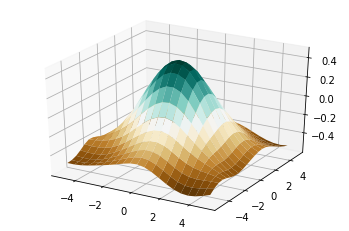

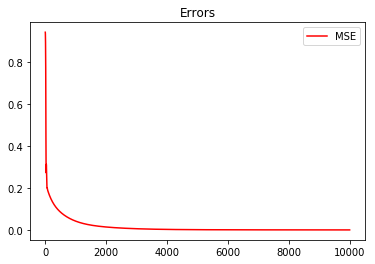

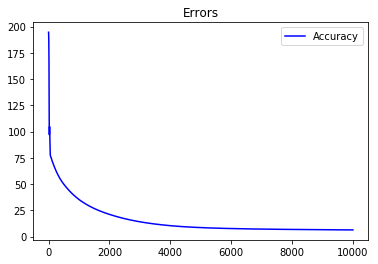

mse
acc


In [103]:


def f(X, Y):
    return np.exp(-X**2*0.1)*np.exp(-Y**2*0.1) - 0.5;

eta = 1e-4
#n_in = 8
n_out = 1
scale = 1
hidden_perceptrons = 25
epochs = 10000


x = np.arange(-5,5.5,0.5)
y = np.arange(-5,5.5,0.5)
#x = x.reshape(-1,1)
#y = y.reshape(-1,1)
#print(x.shape)

X, Y = np.meshgrid(x, y)
print(X.shape)
Z = f(X,Y)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot the surface.
plot = ax.plot_surface(X, Y, Z, cmap=cm.BrBG)
plt.show()


ndata = len(x)*len(y)
T = Z.reshape(1,ndata)

patterns = np.vstack([np.reshape(X,(1,ndata)),np.reshape(Y, (1,ndata))])
patterns = np.vstack([patterns,np.ones(patterns.shape[1])])

print(patterns.shape)
W = scale*np.random.randn(hidden_perceptrons,np.shape(patterns)[0])
V = scale*np.random.randn(n_out,hidden_perceptrons+1)

W_train,V_train,mse,acc = backprop(eta,patterns,T,W,V,hidden_perceptrons,epochs)
W_train = np.asarray(W_train)
V_train = np.asarray(V_train)
print(W_train.shape)
print(V_train.shape)
print(V_train[900,0,1])
_, prediction = forward_pass(patterns,W_train[epochs-1,:,:],V_train[epochs-1,:,:])
print(prediction.shape)
prediction = prediction.reshape(len(x),len(y))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot the surface.
plot = ax.plot_surface(X, Y, prediction, cmap=cm.BrBG)
plt.show()
plt_mse, = plt.plot(np.linspace(0,epochs,epochs),mse,'r', label='MSE')
plt.legend(handles=[plt_mse])
#plt.axis([0,20,0,100])
plt.title('Errors')
plt.show()
plt_acc, = plt.plot(np.linspace(0,epochs,epochs),acc,'b',label='Accuracy')
plt.legend(handles=[plt_acc])
plt.title('Errors')
plt.show()

print("mse")
#print(mse)
print("acc")
#print(acc)

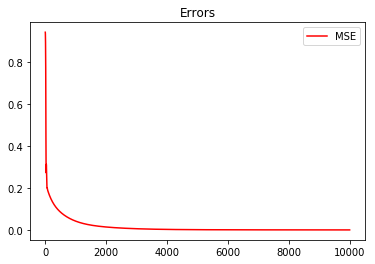

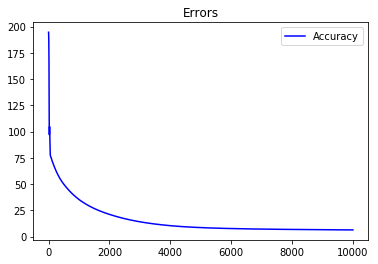

In [104]:
plt_mse, = plt.plot(np.linspace(0,epochs,epochs),mse,'r', label='MSE')
plt.legend(handles=[plt_mse])
#plt.axis([0,20,0,100])
plt.title('Errors')
plt.show()
plt_acc, = plt.plot(np.linspace(0,epochs,epochs),acc,'b',label='Accuracy')
plt.legend(handles=[plt_acc])
plt.title('Errors')
plt.show()

In [111]:
def generateData(train_split,val_split):
    def f(X, Y):
        return np.exp(-X**2*0.1)*np.exp(-Y**2*0.1) - 0.5;
    x = np.arange(-5,5.5,0.5)
    y = np.arange(-5,5.5,0.5)
    X, Y = np.meshgrid(x, y)
    Z = f(X,Y)
    
    ndata = len(x)*len(y)
    T = Z.reshape(1,ndata)

    patterns = np.vstack([np.reshape(X,(1,ndata)),np.reshape(Y, (1,ndata))])
    patterns = np.vstack([patterns,np.ones(patterns.shape[1])])
    
    i = np.arange(patterns.shape[1])
    np.random.shuffle(i)
    patterns = patterns[:,i]
    T = T[:,i]
    '''
    ######
    X = np.ravel(X)
    X = X[i]
    X_tmp = X[:int(train_split*X.shape[0])]
    X_test = X[int(train_split*X.shape[0])+1:-1]
    X_train = X_tmp[:int(val_split*X_tmp.shape[0])]
    X_val = X_tmp[int(val_split*X_tmp.shape[0])+1:-1]
    X.reshape((21,21))
    X_train.reshape(int(val_split*X_tmp.shape[0]))
    ######
    '''
    
    
    
    patterns_tmp = patterns[:,:int(train_split*patterns.shape[1])]
    patterns_test = patterns[:,int(train_split*patterns.shape[1])+1:-1]
    patterns_train = patterns[:,:int(val_split*patterns_tmp.shape[1])]
    patterns_val = patterns[:,int(val_split*patterns_tmp.shape[1])+1:-1]
    
    
    T_tmp = T[:,:int(train_split*T.shape[1])]
    T_test = T[:,int(train_split*T.shape[1])+1:-1]
    T_train = T[:,:int(val_split*T_tmp.shape[1])]
    T_val = T[:,int(val_split*T_tmp.shape[1])+1:-1]
    
    
    return X,Y,Z,patterns_train,patterns_val,patterns_test,T_train,T_val,T_test

#### Model Selection by studying validation error

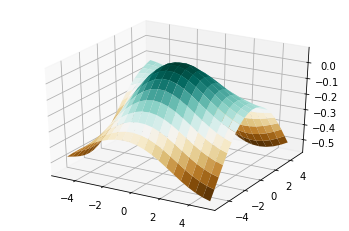

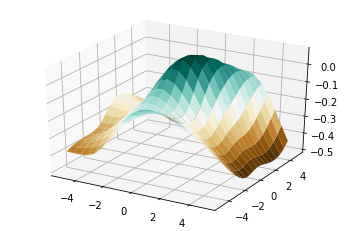

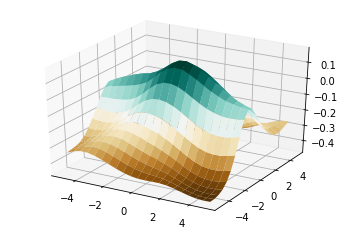

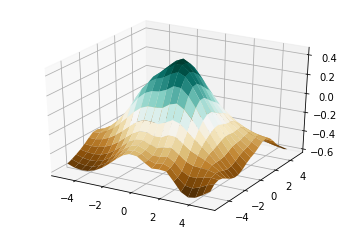

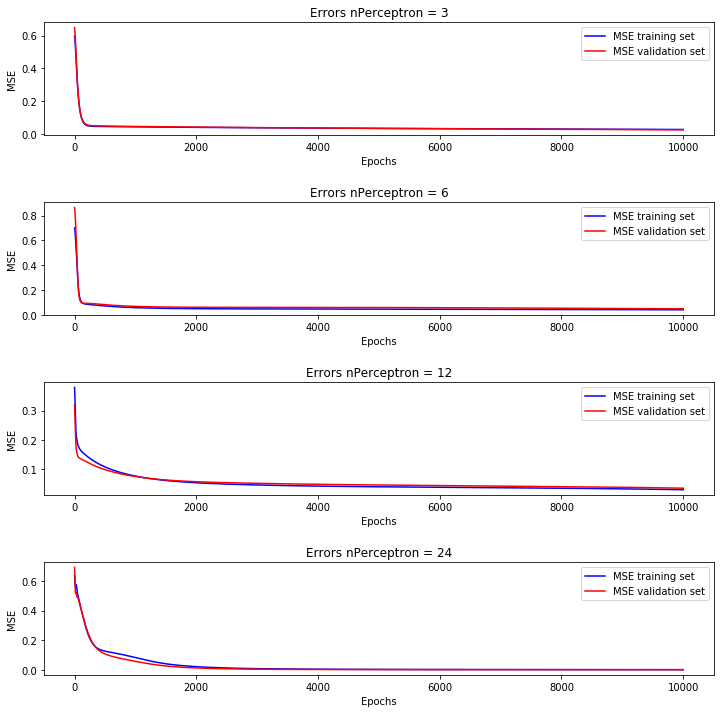

In [126]:
eta = 1e-4
#n_in = 8
n_out = 1
scale = 1
hidden_perceptrons = 25
epochs = 10000
train_split = 0.9
validation_split = 1

X,Y,Z,patterns_train,patterns_val,patterns_test,T_train,T_val,T_test = generateData(train_split,validation_split)

'''
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot = ax.plot_surface(X, Y, Z, cmap=cm.BrBG)
plt.show()
'''


#Initialize weights
W = scale*np.random.randn(hidden_perceptrons,np.shape(patterns_train)[0])
V = scale*np.random.randn(n_out,hidden_perceptrons+1)

#train
W_train,V_train,mse,acc = backprop(eta,patterns_train,T_train,W,V,hidden_perceptrons,epochs)
W_train = np.asarray(W_train)
V_train = np.asarray(V_train)

'''
p = predict(patterns,W_train[epochs-1,:,:],V_train[epochs-1,:,:])
p = p.reshape(X.shape[1],Y.shape[0])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot = ax.plot_surface(X, Y, p, cmap=cm.BrBG)
plt.show()
'''

###############
# Testing number of perceptrons in hidden layer for best model

hidden_perceptrons = [3,6,12,24]

mse_holder = np.zeros((len(hidden_perceptrons),epochs))
mse_val_holder = np.zeros((len(hidden_perceptrons),epochs))
acc_holder = np.zeros((len(hidden_perceptrons),epochs))
acc_val_holder = np.zeros((len(hidden_perceptrons),epochs))

for j,nP in enumerate(hidden_perceptrons):
    
    #Initialize weights
    W = scale*np.random.randn(nP,np.shape(patterns_train)[0])
    V = scale*np.random.randn(n_out,nP+1)

    #train
    W_train,V_train,mse,acc = backprop(eta,patterns_train,T_train,W,V,nP,epochs)
    W_train = np.asarray(W_train)
    V_train = np.asarray(V_train)

    mse_val = []
    acc_val = []

    for i in range(1,W_train.shape[0]):
        p = predict(patterns_val,W_train[i,:,:],V_train[i,:,:])
        mse_val.append(error_mse(T_val,p))
        acc_val.append(accuracy(T_val,p))
    
    mse_holder[j,:] = np.array(mse)
    mse_val_holder[j,:] = np.array(mse_val)
    acc_holder[j,:] = np.array(acc)
    acc_val_holder[j,:] = np.array(acc_val)
    
    _, prediction = forward_pass(patterns,W_train[epochs-1,:,:],V_train[epochs-1,:,:])
    prediction = prediction.reshape(len(x),len(y))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # Plot the surface.
    plot = ax.plot_surface(X, Y, prediction, cmap=cm.BrBG)
    plt.show()


fig, axs = plt.subplots(len(hidden_perceptrons),1, figsize=(12, 12))
fig.subplots_adjust(hspace = 0.6, wspace= 0.3)
axs = axs.ravel()
#print('axs',axs)

k = 0
for p in range(len(hidden_perceptrons)):
    axs[k].plot(np.linspace(0,epochs,epochs),mse_holder[p,:],'b', label='MSE training set')
    axs[k].plot(np.linspace(0,epochs,epochs),mse_val_holder[p,:],'r', label='MSE validation set')
    axs[k].legend()
    axs[k].set_title('Errors nPerceptron = '+str(hidden_perceptrons[p]))
    axs[k].set_xlabel('Epochs')
    axs[k].set_ylabel('MSE')
    """
    axs[p+k+1].plot(np.linspace(0,epochs,epochs),acc_holder[p,:],'b', label='Accuracy training set')
    axs[p+k+1].plot(np.linspace(0,epochs,epochs),acc_val_holder[p,:],'r', label='Accuracy validation set')
    axs[p+k+1].legend()
    axs[p+k+1].set_title('Accuracy nPerceptron= '+str(hidden_perceptrons[p]))
    axs[p+k+1].set_xlabel('Epochs')
    axs[p+k+1].set_ylabel('Accuracy')
    """
    k+=1

plt.show()
    

Med fler perceptroner så har vi fler parametrar och kan bättre approximera funktionen. MSE för vårt valideringsdataset är ibland lägre än för träningssetet vilket är weird men inte orimligt eftersom funktionen kan approximera de punkterna bättre när den försöker mappa sina träningspunkter. Detta borde gälla specifikt när antal träningspunkter är betydligt fler än valideringspunkterna.

#### Evaluating performance with varying size of training set

0.8


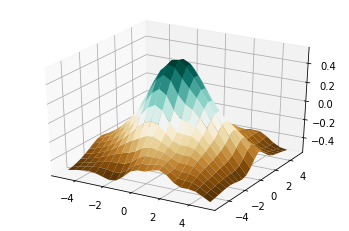

0.6


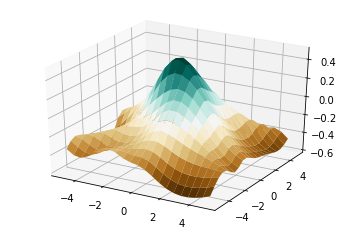

0.4


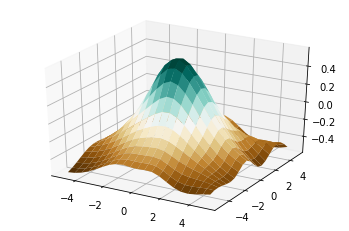

0.2


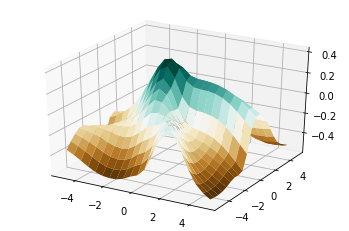

MSE 0.0020711503760399244
MSE val 0.002923114625983303
MSE 0.007560867054034656
MSE val 0.007982121058143287
MSE 0.001576107426405931
MSE val 0.0020005834776510197
MSE 0.011650516512245612
MSE val 0.022513339021071246


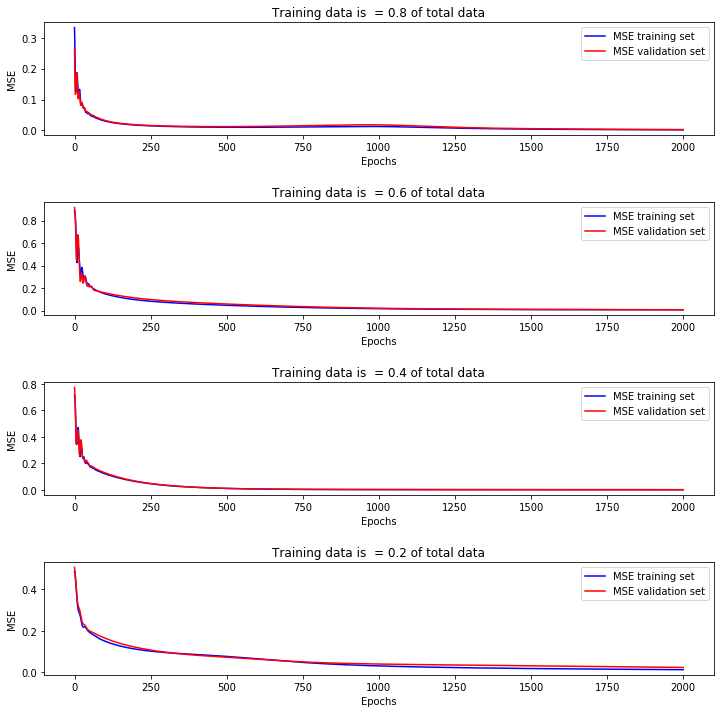

In [140]:
eta = 1e-3
splits = [0.8,0.6,0.4,0.2]
hidden_perceptrons = 24
epochs = 2000

mse_holder = np.zeros((len(splits),epochs))
mse_val_holder = np.zeros((len(splits),epochs))


for j,ratio in enumerate(splits):
    print(ratio)
    #Generate data
    X,Y,Z,patterns_train,patterns_val,patterns_test,T_train,T_val,T_test = generateData(ratio,1)
    
    #Initialize weights
    W = scale*np.random.randn(hidden_perceptrons,np.shape(patterns_train)[0])
    V = scale*np.random.randn(n_out,hidden_perceptrons+1)

    #train
    W_train,V_train,mse,acc = backprop(eta,patterns_train,T_train,W,V,hidden_perceptrons,epochs)
    W_train = np.asarray(W_train)
    V_train = np.asarray(V_train)
    
    mse_val = []

    for i in range(1,W_train.shape[0]):
        p = predict(patterns_val,W_train[i,:,:],V_train[i,:,:])
        mse_val.append(error_mse(T_val,p))
    
    mse_holder[j,:] = np.array(mse)
    mse_val_holder[j,:] = np.array(mse_val)

    _, prediction = forward_pass(patterns,W_train[epochs-1,:,:],V_train[epochs-1,:,:])
    prediction = prediction.reshape(len(x),len(y))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # Plot the surface.
    plot = ax.plot_surface(X, Y, prediction, cmap=cm.BrBG)
    plt.show()

fig, axs = plt.subplots(len(splits),1, figsize=(12, 12))
fig.subplots_adjust(hspace = 0.6, wspace= 0.3)
axs = axs.ravel()
#print('axs',axs)

k = 0
for p in range(len(splits)):
    axs[k].plot(np.linspace(0,epochs,epochs),mse_holder[p,:],'b', label='MSE training set')
    axs[k].plot(np.linspace(0,epochs,epochs),mse_val_holder[p,:],'r', label='MSE validation set')
    axs[k].legend()
    axs[k].set_title('Training data is  = '+str(splits[p]) + ' of total data')
    axs[k].set_xlabel('Epochs')
    axs[k].set_ylabel('MSE')
    
    print("MSE", mse_holder[p,-1])
    print("MSE val", mse_val_holder[p,-1])
    k+=1

plt.show()
    

Med learning rate 10^-3 konvergerar den snabbare.